## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
allGenres = pd.read_csv('data.csv')
df_ylabels = allGenres['label']

In [3]:
allGenres.describe()

tempo        beats  chroma_stft         rmse  spectral_centroid  \
count  1000.000000  1000.000000  1000.000000  1000.000000        1000.000000   
mean    119.601702    57.138000     0.378656     0.130929        2201.834226   
std      28.297367    14.225728     0.081689     0.065685         715.961347   
min      54.978391    18.000000     0.171782     0.005276         569.930721   
25%      99.384014    47.000000     0.319641     0.086625        1627.793931   
50%     117.453835    56.000000     0.383075     0.122448        2209.468780   
75%     135.999178    65.250000     0.435974     0.175793        2691.969702   
max     234.907670   117.000000     0.663573     0.398012        4434.439444   

       spectral_bandwidth      rolloff  zero_crossing_rate        mfcc1  \
count         1000.000000  1000.000000         1000.000000  1000.000000   
mean          2242.559613  4571.702159            0.103637  -144.479173   
std            526.337663  1574.770035            0.041834   100.235661   
min            897.994319   749.062137            0.021701  -552.064063   
25%           1907.136505  3380.956639            0.070281  -200.695133   
50%           2221.408983  4658.671830            0.099539  -120.206072   
75%           2578.474352  5534.197785            0.132007   -73.895019   
max           3509.578677  8676.405868            0.274829    42.034587   

             mfcc2  ...       mfcc11       mfcc12       mfcc13       mfcc14  \
count  1000.000000  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean     99.552199  ...    -6.021121     4.471604    -4.797232     1.781547   
std      31.331904  ...     6.819018     6.717312     6.170919     5.009489   
min      -1.527148  ...   -28.052265   -15.805227   -27.542309   -12.598773   
25%      76.811480  ...   -10.966826    -0.551576    -9.363372    -1.640080   
50%      98.452551  ...    -5.920161     3.891842    -4.199810     1.879424   
75%     119.893638  ...    -1.004241     9.706133    -0.161017     5.155264   
max     193.096518  ...    17.421038    23.037571    13.054333    18.161663   

            mfcc15       mfcc16       mfcc17       mfcc18       mfcc19  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -3.870275     1.147988    -3.967431     0.507303    -2.328779   
std       4.874423     4.579110     4.550650     3.869088     3.755574   
min     -17.545474   -15.693589   -17.227765   -11.975698   -18.504188   
25%      -7.164838    -1.857098    -7.194297    -2.003979    -4.670281   
50%      -3.614473     1.211944    -4.059109     0.669788    -2.391261   
75%      -0.323536     4.350694    -0.842968     3.112518     0.149070   
max      12.357588    13.468803    11.489994    15.379257    14.686910   

            mfcc20  
count  1000.000000  
mean     -1.094875  
std       3.837561  
min     -19.935203  
25%      -3.368000  
50%      -1.155198  
75%       1.303739  
max      15.368966  

[8 rows x 28 columns]

In [4]:
allGenres.sample(10)

filename       tempo  beats  chroma_stft      rmse  \
999       rock.00066.au   75.999540     36     0.360098  0.042995   
286    country.00095.au   89.102909     42     0.328710  0.175383   
355      disco.00023.au  112.347147     55     0.435232  0.178279   
164  classical.00030.au  117.453835     53     0.278349  0.029736   
460     hiphop.00098.au  107.666016     51     0.533298  0.119099   
810     reggae.00002.au  103.359375     48     0.378555  0.092505   
10       blues.00093.au   58.726918     26     0.377690  0.065906   
684      metal.00093.au  172.265625     83     0.443969  0.092050   
468     hiphop.00096.au  107.666016     53     0.424750  0.110878   
426     hiphop.00021.au   99.384014     48     0.430178  0.241990   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
999        2209.357588         2175.214294  4575.588999            0.107147   
286        1555.945969         1761.610245  3218.172207            0.067229   
355        3167.795848         2935.013937  6730.525968            0.151003   
164        1243.718021         1358.625381  2353.127438            0.063724   
460        2538.368061         2341.604484  5353.609294            0.100670   
810        1797.317239         2103.190592  3926.517924            0.075127   
10          569.930721          995.407125   927.427725            0.021701   
684        2644.707345         2267.926389  5176.768697            0.141647   
468        1752.161419         1811.556742  3489.162235            0.083126   
426        2405.930576         2268.813332  4987.661507            0.119732   

          mfcc1  ...     mfcc12     mfcc13    mfcc14     mfcc15    mfcc16  \
999 -245.160921  ...   0.813777 -13.018359  0.053168  -8.232851  1.059255   
286 -124.810660  ...   3.202979  -1.591632 -2.152463  -3.521563  2.209645   
355  -32.143401  ...  -4.888929  -2.342258 -1.679452  -3.495601 -2.679210   
164 -315.649646  ...  -7.668729  -5.870954 -4.857394  -5.141024 -5.416104   
460 -129.918275  ...  14.666472  -2.934063  9.043224  -4.725942  5.380304   
810 -189.015005  ...   8.097781 -10.627109 -2.545040  -4.712322 -1.035399   
10  -350.436204  ...   1.821690  -5.970892 -5.259568  -0.229211 -1.776851   
684 -104.962497  ...  11.059757 -15.279959  5.312950 -14.506225  4.757283   
468 -128.123524  ...  12.313310  -4.650122  5.829997  -2.865121  3.684055   
426  -27.604936  ...  13.877727 -10.467597  8.189066 -10.303038  5.012810   

        mfcc17     mfcc18    mfcc19    mfcc20      label  
999  -8.031864  -0.397097 -4.349921 -4.220998       rock  
286  -1.407159  -1.691463 -1.027175 -2.628084    country  
355   1.005249   4.010317  4.697635  5.848717      disco  
164  -3.173172   1.450925  0.128026 -4.178903  classical  
460  -2.408319   1.620739 -5.978244 -0.826952     hiphop  
810  -3.207945   2.699879 -3.979347  2.879191     reggae  
10   -3.713751   0.181590  2.072390 -2.896225      blues  
684 -11.460761  -0.112011 -6.508919 -2.668230      metal  
468  -1.874012  -0.141089 -2.054761 -3.224440     hiphop  
426  -5.740502  10.313155  3.645090  9.234663     hiphop  

[10 rows x 30 columns]

In [5]:
allGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [6]:
allGenres['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### Removing useless feature

In [7]:
allGenres.drop('filename', inplace=True, axis=1)

In [8]:
allGenres.sample(10)

tempo  beats  chroma_stft      rmse  spectral_centroid  \
838  161.499023     77     0.389230  0.129177        1629.188676   
909  151.999081     75     0.402529  0.079205        2669.225602   
394  123.046875     62     0.323354  0.184528        2550.028312   
823   95.703125     46     0.370643  0.132952        2322.862432   
737  112.347147     53     0.433487  0.215937        3150.247439   
18   103.359375     44     0.376687  0.141018        1239.337228   
323  123.046875     60     0.482954  0.172593        3713.486946   
212   83.354335     40     0.305422  0.038873        1495.431718   
340  129.199219     63     0.357579  0.122907        3653.421307   
714   92.285156     42     0.374629  0.093983        2125.267705   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
838         1886.452718  3258.830294            0.067112 -147.068005   
909         2440.309176  5445.858736            0.133422 -123.329430   
394         2485.844194  5585.282893            0.115890  -91.869594   
823         2804.136860  5451.950366            0.080739 -121.467130   
737         3220.167078  7292.222572            0.127355  -45.055029   
18          1659.466470  2517.618110            0.050908 -206.278431   
323         3188.498151  7726.703278            0.198247  -20.461655   
212         2331.783937  3052.531542            0.035481 -353.229087   
340         3234.175702  7835.319288            0.180835  -65.764855   
714         2673.801946  4978.811560            0.067695 -169.122221   

          mfcc2  ...     mfcc12    mfcc13    mfcc14     mfcc15    mfcc16  \
838  120.104982  ...   4.335553  4.637524  4.007742   3.050735  0.542456   
909   74.883330  ...   3.473368  1.668363 -3.159484  -1.081949  0.317692   
394   87.608503  ...  11.848769 -9.815090  9.110837 -11.468970 -1.048463   
823   89.577399  ...  -5.427796 -6.547105 -4.701977  -3.281239 -6.463206   
737   69.765294  ...  -0.837510  2.121588  1.126969   0.007490  0.762866   
18   126.627468  ...   3.659409 -1.448481 -1.695150  -7.157464  1.171114   
323   53.701958  ...  -0.772570 -5.885662  2.321715   0.366265  2.746411   
212  110.660472  ...  -0.965016 -6.479883 -4.243259  -3.750993 -6.012603   
340   52.828254  ...  -1.887074 -7.244224 -5.266682  -3.038180 -4.335730   
714   94.648315  ...   1.254533 -4.152501 -3.128182   0.295032 -3.551594   

        mfcc17    mfcc18    mfcc19    mfcc20    label  
838  -6.143036 -1.649563 -0.723848  0.205033   reggae  
909  -5.988238 -0.320170 -2.339703 -4.321177     rock  
394 -11.647764  0.293419 -1.280613  0.098424    disco  
823  -6.658291 -4.413392 -3.162141 -3.980088   reggae  
737  -1.476882  3.654368  4.453744  4.202002      pop  
18   -6.221975  0.600703 -1.605095 -0.528774    blues  
323  -0.532718 -1.201477  0.249273 -1.271460    disco  
212  -7.186445 -2.490522 -4.028939 -3.417522  country  
340  -2.541413  0.725952 -0.304219  2.940630    disco  
714  -2.806368 -5.756841 -5.214618 -0.096053      pop  

[10 rows x 29 columns]

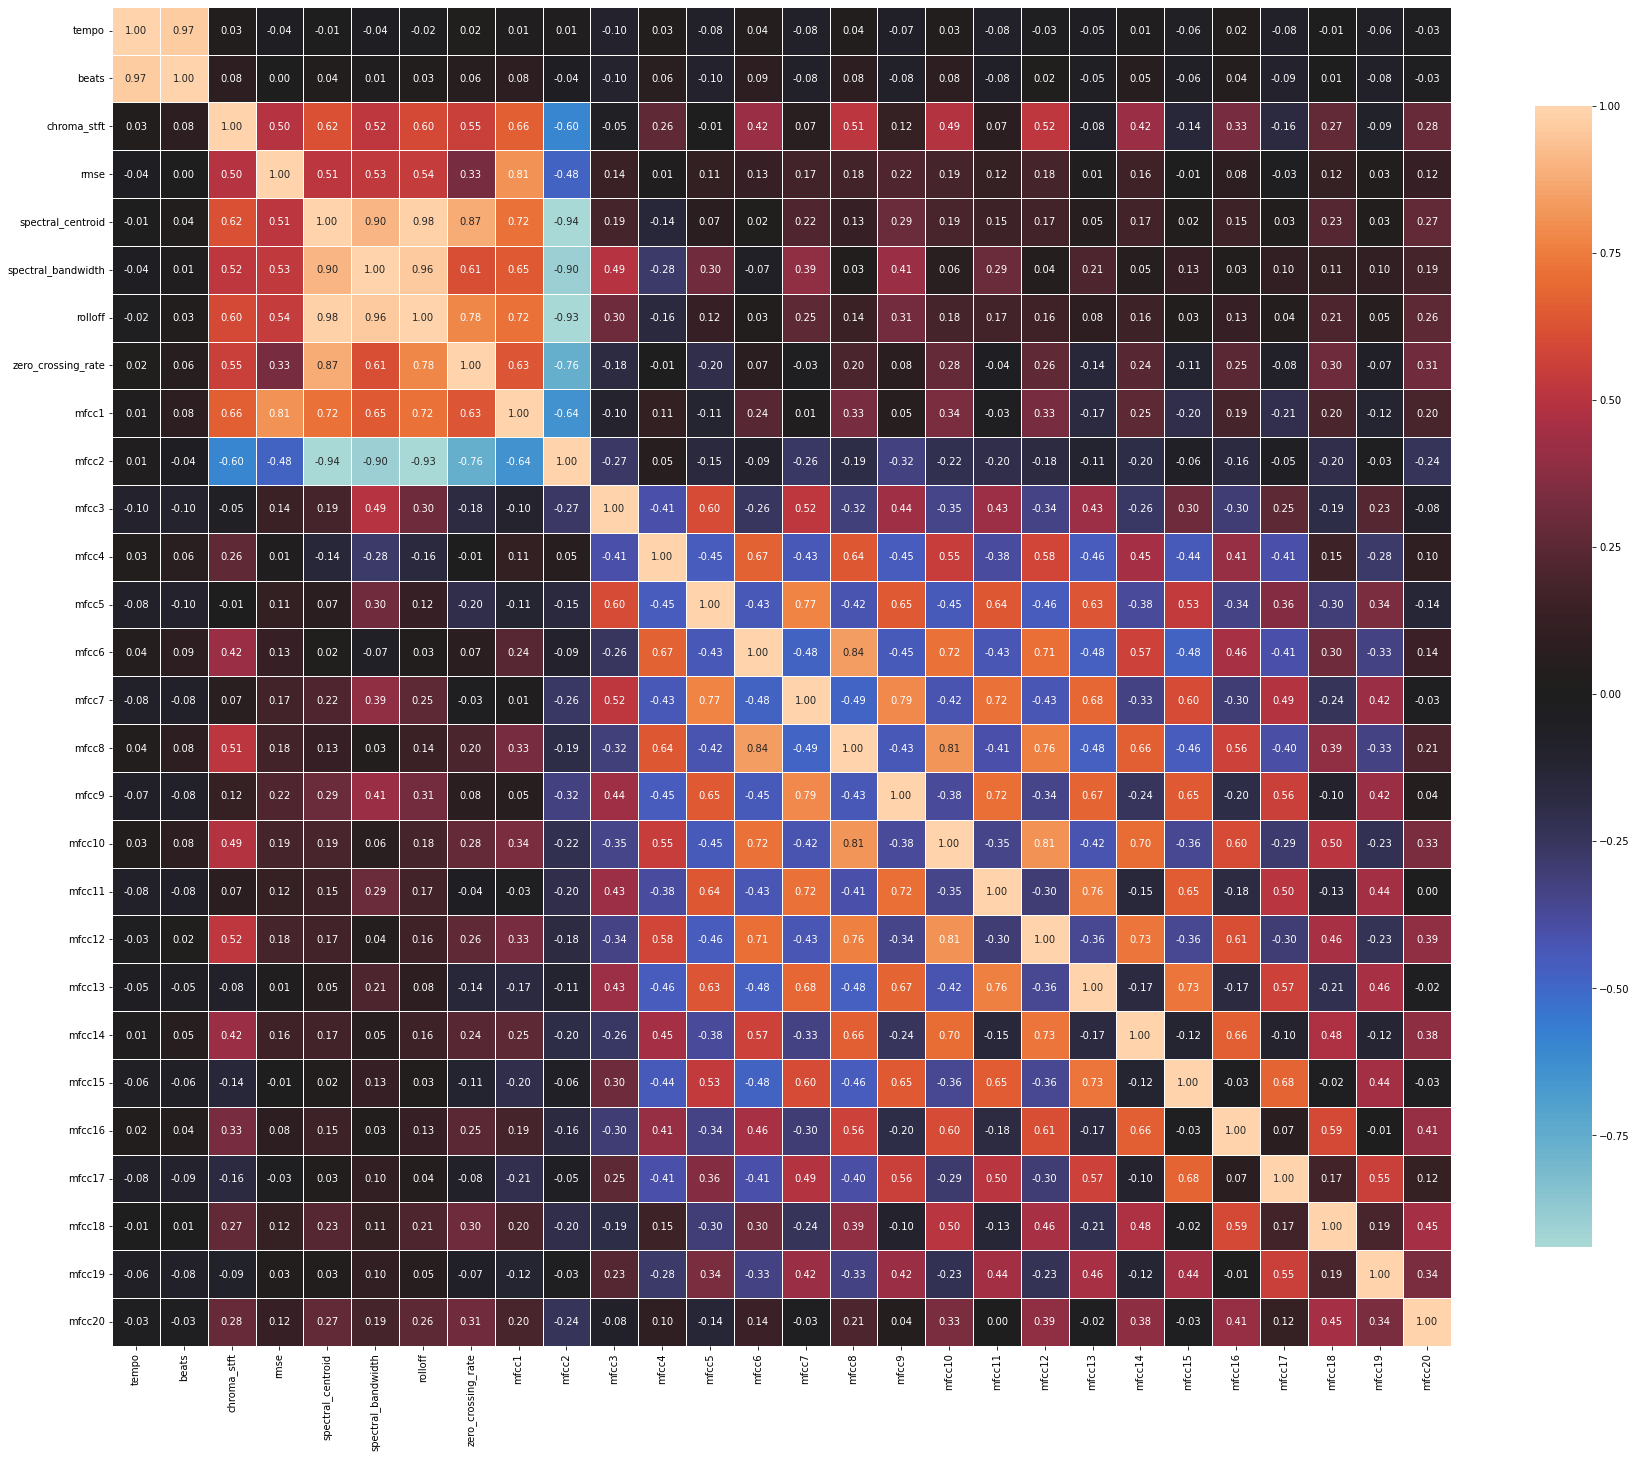

In [9]:
correlations = allGenres.corr()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

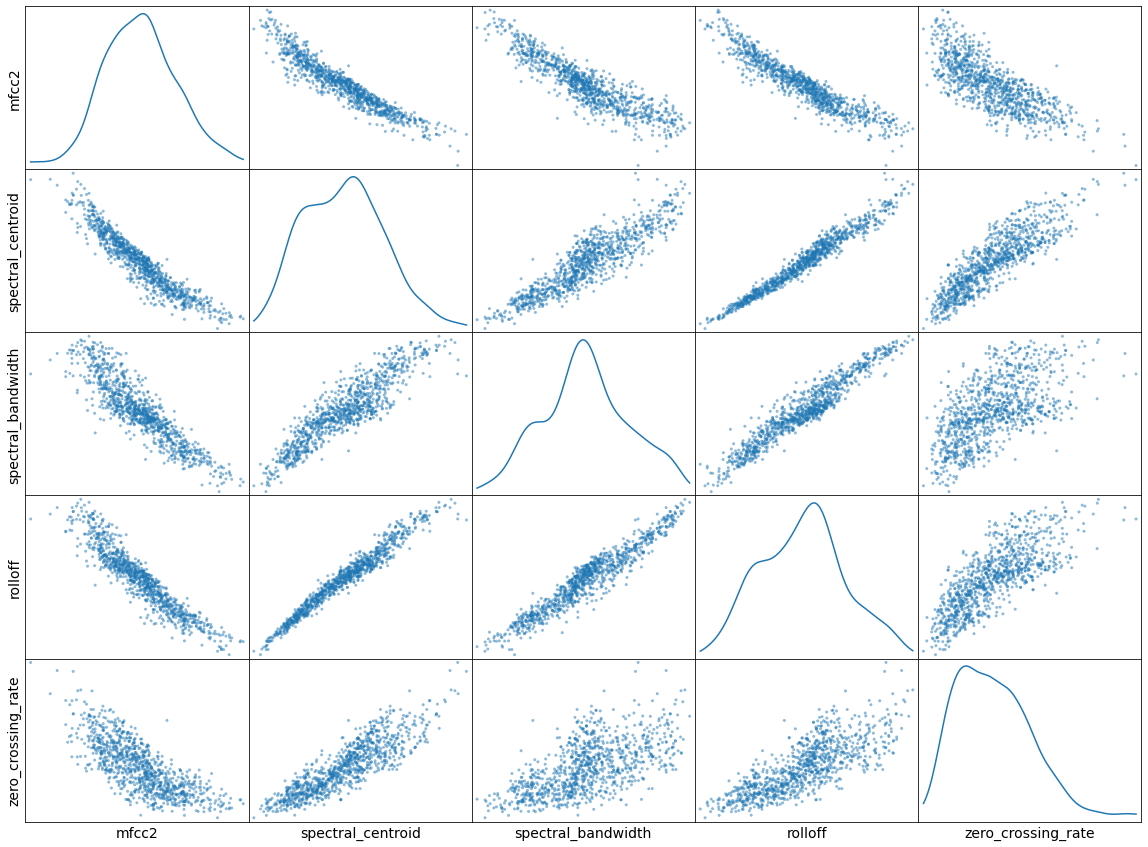

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["mfcc2", "spectral_centroid",
              "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
sm = scatter_matrix(allGenres[attributes], figsize=(20, 15), diagonal="kde");

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize=14)
    x.set_ylabel(x.get_ylabel(), fontsize=14)

## Split data into test data and train data

In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

allGenres['label'] = label_encoder.fit_transform(allGenres['label'].astype(str))
allGenres

tempo  beats  chroma_stft      rmse  spectral_centroid  \
0    103.359375     50     0.380260  0.248262        2116.942959   
1     95.703125     44     0.306451  0.113475        1156.070496   
2    151.999081     75     0.253487  0.151571        1331.073970   
3    184.570312     91     0.269320  0.119072        1361.045467   
4    161.499023     74     0.391059  0.137728        1811.076084   
..          ...    ...          ...       ...                ...   
995  123.046875     59     0.418812  0.166056        2312.030070   
996  117.453835     56     0.335774  0.093676        2553.856706   
997  103.359375     45     0.372834  0.208743        1345.850763   
998  112.347147     45     0.344472  0.180163        1675.475369   
999   75.999540     36     0.360098  0.042995        2209.357588   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           1956.611056  4196.107960            0.127272  -26.929785   
1           1497.668176  2170.053545            0.058613 -233.860772   
2           1973.643437  2900.174130            0.042967 -221.802549   
3           1567.804596  2739.625101            0.069124 -207.208080   
4           2052.332563  3927.809582            0.075480 -145.434568   
..                  ...          ...                 ...         ...   
995         2060.825761  4528.197619            0.140588  -41.402023   
996         2219.090892  5123.752351            0.136173 -121.410791   
997         1841.748033  2939.265560            0.041099 -127.946876   
998         1653.422860  3253.563659            0.087294  -98.356322   
999         2175.214294  4575.588999            0.107147 -245.160921   

          mfcc2  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0    107.334008  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1    136.170239  ...  -2.250578   3.959198  5.322555  0.812028 -1.107202   
2    110.843070  ... -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   
3    132.799175  ...  -0.613248   0.384877  2.605128 -5.188924 -9.527455   
4    102.829023  ...   7.457218 -10.470444 -2.360483 -6.783623  2.671134   
..          ...  ...        ...        ...       ...       ...       ...   
995  105.403012  ...  11.303100 -14.155566  2.824157 -9.477822  3.331261   
996   89.522283  ...   9.149520 -10.112054  4.211237 -9.349345  1.609701   
997  134.443879  ...  11.043714  -8.385375  2.111019 -6.338260  0.997383   
998  136.611573  ...   2.945863 -12.509212  0.091337 -0.774780 -5.700102   
999   95.089813  ...   0.813777 -13.018359  0.053168 -8.232851  1.059255   

        mfcc17     mfcc18     mfcc19     mfcc20  label  
0    -6.829571   0.965922  -7.570825   2.918987      0  
1    -4.556555  -2.436490   3.316913  -0.608485      0  
2   -14.682694 -11.719264 -11.025216 -13.387260      0  
3    -9.244394  -2.848274  -1.418707  -5.932607      0  
4    -4.760879  -0.949005   0.024832  -2.005315      0  
..         ...        ...        ...        ...    ...  
995  -8.200088   3.693091  -3.673562  -0.163201      9  
996 -10.553566   1.066489  -1.654875   7.544224      9  
997  -5.325869  -0.842192  -4.665996  -4.787677      9  
998  -8.630916  -1.903803  -2.196753  -3.395148      9  
999  -8.031864  -0.397097  -4.349921  -4.220998      9  

[1000 rows x 29 columns]

In [12]:
df_x = allGenres.drop('label', axis=1)
df_y = allGenres['label']

In [13]:
df_x.sample(5)

tempo  beats  chroma_stft      rmse  spectral_centroid  \
15   161.499023     80     0.289932  0.103115        2513.716817   
302  129.199219     63     0.420332  0.173692        2874.926232   
737  112.347147     53     0.433487  0.215937        3150.247439   
589   95.703125     46     0.274084  0.069791        1193.605335   
906   89.102909     44     0.359297  0.157094        1282.196292   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
15          2345.230614  5247.443269            0.135146 -113.167773   
302         2759.729292  6019.138603            0.134784  -62.806194   
737         3220.167078  7292.222572            0.127355  -45.055029   
589         1559.295685  2480.185003            0.042452 -260.896243   
906         1729.636951  2675.817153            0.047189 -140.425493   

          mfcc2  ...     mfcc11    mfcc12     mfcc13    mfcc14    mfcc15  \
15    88.709334  ... -15.081730  8.748788 -18.630899  5.474218 -9.267430   
302   77.884282  ...   4.067475  0.984862   5.618053  0.688097 -0.131621   
737   69.765294  ...   3.857668 -0.837510   2.121588  1.126969  0.007490   
589  138.539297  ...  -1.612200 -1.719607   3.948859  0.235711 -0.426629   
906  149.298998  ...  -9.246528  4.695918  -8.369734  2.277241 -6.510628   

       mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  
15   8.017964 -9.552074  5.873594 -4.402835  3.615349  
302  2.206272 -1.850217 -6.809113 -3.191937 -3.545320  
737  0.762866 -1.476882  3.654368  4.453744  4.202002  
589  0.233013  1.518296 -2.239234 -1.458901 -5.162641  
906 -1.624937 -6.497939 -4.727856 -2.574812 -1.786617  

[5 rows x 28 columns]

In [14]:
df_y.sample(5)

893    8
456    4
189    1
535    5
647    6
Name: label, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

## Apply PCA

In [16]:
from sklearn.decomposition import PCA
import statsmodels.api as sm


def apply_pca(X, n, add_constant=False):
    pca = PCA(n_components=n)
    x_new = pca.fit_transform(X)

    if add_constant is True:
        x_new = sm.add_constant(x_new)

    return pca, pd.DataFrame(x_new)

In [17]:
pca, _ = apply_pca(df_x, len(list(df_x.columns)))

In [18]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [9.84904058e-01 1.06458260e-02 2.45374986e-03 1.37770967e-03
 3.00765182e-04 1.20648586e-04 5.27146450e-05 3.84803675e-05
 2.48200484e-05 1.69918938e-05 1.43485887e-05 8.35947933e-06
 6.18139057e-06 5.31435976e-06 4.88096859e-06 4.24544157e-06
 3.75477384e-06 3.35515255e-06 2.80529798e-06 2.53277334e-06
 2.05861853e-06 1.87874819e-06 1.65127948e-06 1.55481981e-06
 1.31308247e-06 5.94669474e-10 2.52241036e-10 2.04759753e-11]


Text(0, 0.5, 'cumulative variance')

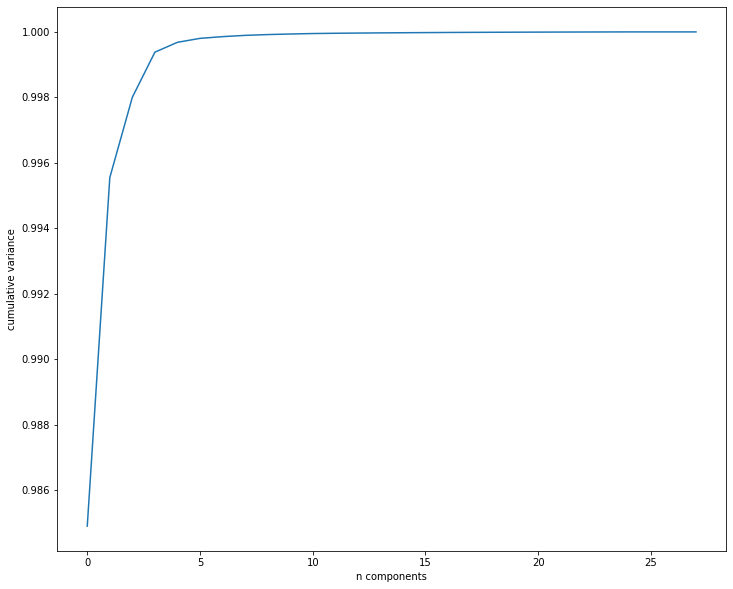

In [19]:
plt.figure(figsize=(12, 10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [20]:
pca = PCA(n_components=3)
musicPCA = pca.fit_transform(df_x)

In [21]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.98490406 0.01064583 0.00245375]


In [22]:
# pca = PCA(n_components = 4)
# musicPCA = pca.fit_transform(df_x)
# print("Explained Variance:", pca.explained_variance_ratio_)

In [23]:
componentDf = pd.DataFrame(data=musicPCA, columns=['pc1', 'pc2', 'pc3'])

In [24]:
musicPCA = pd.concat([componentDf, df_ylabels], axis=1)

In [25]:
musicPCA

pc1         pc2        pc3  label
0    -437.764309  194.339340 -70.976368  blues
1   -2724.658925   -2.261800  29.199490  blues
2   -1882.730034 -283.925766  58.805190  blues
3   -2125.187321   56.204873 -67.131142  blues
4    -770.057069  -73.147524 -70.060711  blues
..           ...         ...        ...    ...
995   -42.045653  223.432171 -35.689699   rock
996   615.406676  223.774566 -40.387723   rock
997 -1876.311153 -166.221397 -44.773838   rock
998 -1524.013912  179.354200 -76.103476   rock
999   -16.605943   50.076319  -9.053122   rock

[1000 rows x 4 columns]

In [26]:
df_y.rename("label2", inplace=True)
df_y2 = pd.concat([df_ylabels, df_y], axis=1)
df_y2

label  label2
0    blues       0
1    blues       0
2    blues       0
3    blues       0
4    blues       0
..     ...     ...
995   rock       9
996   rock       9
997   rock       9
998   rock       9
999   rock       9

[1000 rows x 2 columns]

In [27]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

Text(0, 0.5, 'Principal Component 2')

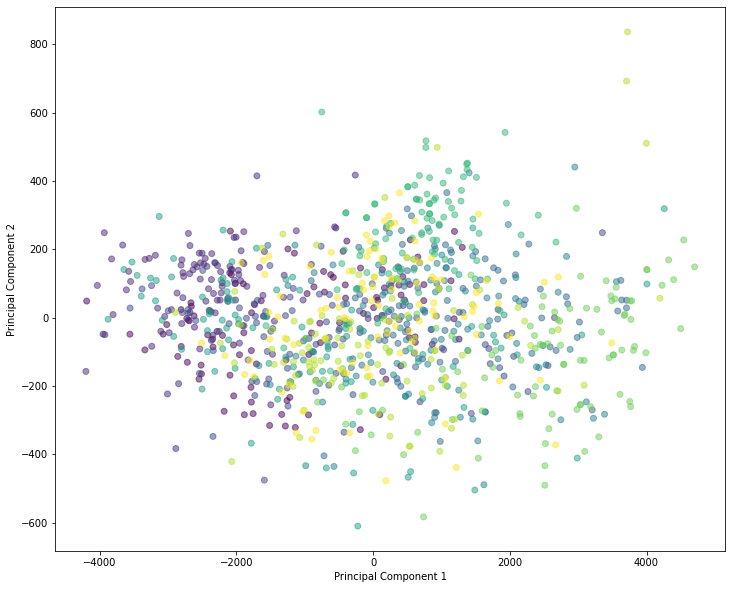

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

# ax.scatter(withLabelsDf['pc1'],withLabelsDf['pc2'], c = withLabelsDf['label'],label = df_ylabels)
ax.scatter(musicPCA['pc1'], musicPCA['pc2'], c=df_y2['label2'], label=df_y2['label'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# #
# # for index, color in df_y2.iterrows():
# #     n = 750
# #     # print(color['label2'])
# #     x, y = np.random.rand(2, n)
# #     scale = 200.0 * np.random.rand(n)
# #     ax.scatter(x, y, c=color['label2'], s=scale, label=color['label'],
# #                alpha=0.3, edgecolors='none')
# from collections import OrderedDict
#
# by_label = OrderedDict(zip(df_y2['label'],df_y2['label2']))
# plt.legend(by_label.values(), by_label.keys())


In [29]:
import plotly.express as px

fig = px.scatter(musicPCA, x=musicPCA['pc1'], y=musicPCA['pc2'], color=musicPCA['label'])
fig.show()

In [30]:
fig = px.scatter_3d(musicPCA,  x=musicPCA['pc1'], y=musicPCA['pc2'],  z=musicPCA['pc3'], color=musicPCA['label'])
fig.show()

## Build Model and Helper Functions

In [31]:
result_dict = {}

In [32]:
from sklearn.metrics import *


def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return {'accuracy': acc,
            'precision': prec,
            'recall': recall,
            'accuracy_count': num_acc}

In [33]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)) # labels to remove zero division errors due to missing predictions 
    recall = recall_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall, 
            'accuracy_count':num_acc}

In [34]:
def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

    model = classifier_fn(x_train, y_train)

    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)

    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': train_summary,
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [35]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])

        print()

### SGD Function

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('always') 


def sgd_fn(x_train, y_train, max_iter=1000, tol=1e-3):
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    return model

In [37]:
musicPCA_labels = musicPCA

label_encoding = preprocessing.LabelEncoder()
musicPCA['label'] = label_encoding.fit_transform((musicPCA['label']).astype(str))


In [38]:
FEATURES = list(musicPCA.columns[1:])



In [39]:
result_dict['genres ~ sgd'] = build_model(sgd_fn,
                                          'label',
                                          FEATURES,
                                          musicPCA)
print(result_dict['genres ~ sgd']['confusion_matrix'])
compare_results()

y_test   0   1  2  3  4   5   6   7   8  9
y_pred                                    
0        1   0  0  0  0   0   0   0   0  0
1        0   4  1  0  0   0   0   0   0  0
3       11   0  5  4  4   5   3   0   1  2
5        1   0  0  0  0   0   0   0   0  0
7        5   3  7  4  8   5   0   2   2  1
8        1  14  3  7  4   2  12   2   2  8
9        0   0  3  7  4  10   0  13  20  9
Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22



### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression


def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    return model

In [41]:
result_dict['genres ~ logistic'] = build_model(logistic_fn,
                                               'label',
                                               FEATURES,
                                               musicPCA)
print(result_dict['genres ~ sgd']['confusion_matrix'])
compare_results()

y_test   0   1  2  3  4   5   6   7   8  9
y_pred                                    
0        1   0  0  0  0   0   0   0   0  0
1        0   4  1  0  0   0   0   0   0  0
3       11   0  5  4  4   5   3   0   1  2
5        1   0  0  0  0   0   0   0   0  0
7        5   3  7  4  8   5   0   2   2  1
8        1  14  3  7  4   2  12   2   2  8
9        0   0  3  7  4  10   0  13  20  9
Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116



### Linear discriminant analysis

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def linear_discriminant_fn(x_train, y_train, solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)

    return model

In [43]:
result_dict['genres ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn,
                                                                   'label',
                                                                   FEATURES,
                                                                   musicPCA)
compare_results()

Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116

Classification:  genres ~ linear_discriminant_analysis

Training data
accuracy 0.2125
precision 0.14992775039324224
recall 0.2639751552795031
accuracy_count 170

Test data
accuracy 0.26
precision 0.27254627822537913
recall 0.3333333333333333
accuracy_count 52



### Linear SVC

In [44]:
from sklearn.svm import LinearSVC


def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)

    return model

In [45]:
result_dict['genres ~ linear_svc'] = build_model(linear_svc_fn,
                                                 'label',
                                                 FEATURES,
                                                 musicPCA)

compare_results()

Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116

Classification:  genres ~ linear_discriminant_analysis

Training data
accuracy 0.2125
precision 0.14992775039324224
recall 0.2639751552795031
accuracy_count 170

Test data
accuracy 0.26
precision 0.27254627822537913
recall 0.3333333333333333
accuracy_count 52

Classification:  genres ~ linear_svc

Training data
accuracy 0.6225
precision 0.6428941102036377
recall 0.6225
accuracy_count 498

Test data
accuracy 0.665
precision 0.7015973260321059
recall 0.665
accuracy_count 133



### Radius Neighbors Regression

In [46]:
from sklearn.neighbors import RadiusNeighborsClassifier


def radius_neighbor_fn(x_train, y_train, radius=200):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)

    return model

In [47]:
result_dict['genres ~ radius_neighbors'] = build_model(radius_neighbor_fn,
                                                       'label',
                                                       FEATURES,
                                                       musicPCA)
compare_results()

Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116

Classification:  genres ~ linear_discriminant_analysis

Training data
accuracy 0.2125
precision 0.14992775039324224
recall 0.2639751552795031
accuracy_count 170

Test data
accuracy 0.26
precision 0.27254627822537913
recall 0.3333333333333333
accuracy_count 52

Classification:  genres ~ linear_svc

Training data
accuracy 0.6225
precision 0.6428941102036377
recall 0.6225
accuracy_count 498

Test data
accuracy 0.665
precision 0.7015973260321059
recall 0.665
accuracy_count 133

Classification:  genres ~ radius_neighbors

Training data
accuracy 0

### Decision Tree

In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 4, 5, 7, 9, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 10}

In [53]:
for i in range(6):
    print('Parameters: ', grid_search.cv_results_['params'][i])

    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'max_depth': 2}
Mean Test Score:  0.26872424506960285
Rank:  6
Parameters:  {'max_depth': 4}
Mean Test Score:  0.3824871166680747
Rank:  5
Parameters:  {'max_depth': 5}
Mean Test Score:  0.3962762712023504
Rank:  4
Parameters:  {'max_depth': 7}
Mean Test Score:  0.4187341011705293
Rank:  3
Parameters:  {'max_depth': 9}
Mean Test Score:  0.42872631015741597
Rank:  2
Parameters:  {'max_depth': 10}
Mean Test Score:  0.4337247613415561
Rank:  1


In [54]:
from sklearn.tree import DecisionTreeClassifier


def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    model = DecisionTreeClassifier( \
    max_depth = grid_search.best_params_['max_depth']).fit(x_train, y_train)
    model.fit(x_train, y_train)

    return model

In [55]:
result_dict['genres ~ decision_tree'] = build_model(decision_tree_fn,
                                                    'label',
                                                    FEATURES,
                                                    musicPCA)

compare_results()

Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116

Classification:  genres ~ linear_discriminant_analysis

Training data
accuracy 0.2125
precision 0.14992775039324224
recall 0.2639751552795031
accuracy_count 170

Test data
accuracy 0.26
precision 0.27254627822537913
recall 0.3333333333333333
accuracy_count 52

Classification:  genres ~ linear_svc

Training data
accuracy 0.6225
precision 0.6428941102036377
recall 0.6225
accuracy_count 498

Test data
accuracy 0.665
precision 0.7015973260321059
recall 0.665
accuracy_count 133

Classification:  genres ~ radius_neighbors

Training data
accuracy 0

### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB


def naive_bayes_fn(x_train, y_train, priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)

    return model

In [51]:
result_dict['genres ~ naive_bayes'] = build_model(naive_bayes_fn,
                                                    'label',
                                                    FEATURES,
                                                    musicPCA)

compare_results()

Classification:  genres ~ sgd

Training data
accuracy 0.17125
precision 0.3231651540134607
recall 0.24729241877256317
accuracy_count 137

Test data
accuracy 0.11
precision 0.29362717992854975
recall 0.1506849315068493
accuracy_count 22

Classification:  genres ~ logistic

Training data
accuracy 0.61125
precision 0.6290680684764867
recall 0.61125
accuracy_count 489

Test data
accuracy 0.58
precision 0.6321717159277505
recall 0.58
accuracy_count 116

Classification:  genres ~ linear_discriminant_analysis

Training data
accuracy 0.2125
precision 0.14992775039324224
recall 0.2639751552795031
accuracy_count 170

Test data
accuracy 0.26
precision 0.27254627822537913
recall 0.3333333333333333
accuracy_count 52

Classification:  genres ~ linear_svc

Training data
accuracy 0.6225
precision 0.6428941102036377
recall 0.6225
accuracy_count 498

Test data
accuracy 0.665
precision 0.7015973260321059
recall 0.665
accuracy_count 133

Classification:  genres ~ radius_neighbors

Training data
accuracy 0